# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
#loading the train data set
train_df = pd.read_csv('df_train.csv')

In [3]:
# loading the test data set
test_df = pd.read_csv('df_test.csv')

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Let's get an overview of what is contained in both the train data set and the test data set. 

In [4]:
train_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

We can see from above that the dataframe has 3 categorical variables: time, valencia_wind_deg, and Seville_pressure, while the rest are numerical variables consisting of floats or integers. 
As a start, I will deal with the categorical variables first before looking at the numerical variables because in regression, the emphasis is on numerical variables. 

# 4.1 Time Feature - Data Cleaning

In [7]:
train_df['time'].unique().shape

(8763,)

In [8]:
train_df['time'].isnull().sum()

0

In [9]:
train_df['time'].head()

0    2015-01-01 03:00:00
1    2015-01-01 06:00:00
2    2015-01-01 09:00:00
3    2015-01-01 12:00:00
4    2015-01-01 15:00:00
Name: time, dtype: object

In [10]:
train_df['time'].tail()

8758    2017-12-31 09:00:00
8759    2017-12-31 12:00:00
8760    2017-12-31 15:00:00
8761    2017-12-31 18:00:00
8762    2017-12-31 21:00:00
Name: time, dtype: object

We can see that there are 8763 unique entries in the time variable and that the time is in 3 hourly intervals. Also there are no missing values. We have three years data that starts from January 2015 to December 2017. 

The next step is to convert the time feature to a datetime datatype and then extract the relevant time measures like year, month, weekday, and hour. 

In [11]:
# copy the dataframe and store in a separate variable
train_df_clean = train_df.copy()
# make the unnamed column the index
train_df_clean = train_df_clean.set_index('Unnamed: 0')


In [12]:
# convert the time variable to a datetime datatype
train_df_clean['time'] = pd.to_datetime(train_df_clean['time'])

In [13]:
# extract relevant metrics like year, month, weekday, hour from the time feature
train_df_clean['Year'] = train_df_clean['time'].dt.year


In [14]:
# extract month
train_df_clean['Month'] = train_df_clean['time'].dt.month
# extract weekday
train_df_clean['Weekday'] = train_df_clean['time'].dt.dayofweek
# extract hour from the time feature
train_df_clean['Hour'] = train_df_clean['time'].dt.hour
train_df_clean.head()





In [15]:
# extract weekday
train_df_clean['Weekday'] = train_df_clean['time'].dt.dayofweek



In [16]:
# extract hour from the time feature
train_df_clean['Hour'] = train_df_clean['time'].dt.hour
train_df_clean.head()




,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,3,3
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,3,6
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,3,9
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,3,12
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,3,15


In [17]:
# we now drop the time feature since the relevant metrics have been extracted
train_df_clean.drop("time", axis=1, inplace=True)
train_df_clean.head(2)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,3,3
1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,3,6


I will now extract the same features from the test dataset because it would be useful in predicting when I get a model to have the two dataset with the same format. But I will not drop the time feature now but later when I want to predict on the model. 

In [18]:
# store the test data set in another dataframe
test_df_clean = test_df.copy()
# make the unnamed column the index
test_df_clean = test_df_clean.set_index('Unnamed: 0')
test_df_clean.head(2)


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [19]:
# convert the time variable to a datetime datatype
test_df_clean['time'] = pd.to_datetime(test_df_clean['time'])
test_df_clean.head(2)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.0,...,287.816667,280.816667,287.356667,276.150000,280.38,286.816667,285.15,283.15,279.866667,279.15
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.0,...,284.816667,280.483333,284.190000,277.816667,281.01,283.483333,284.15,281.15,279.193333,278.15


In [20]:
# extract relevant metrics like year, month, weekday, hour from the time feature
test_df_clean['Year'] = test_df_clean['time'].dt.year
# extract month
test_df_clean['Month'] = test_df_clean['time'].dt.month
# extract weekday
test_df_clean['Weekday'] = test_df_clean['time'].dt.dayofweek
# extract hour from the time feature
test_df_clean['Hour'] = test_df_clean['time'].dt.hour
test_df_clean.head()



,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Year,Month,Weekday,Hour
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,2018,1,0,0
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,2018,1,0,3
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,2018,1,0,6
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,2018,1,0,9
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,2018,1,0,12


# 4.2 Exploratory Data Analysis On The Time Features
It would be useful to do data analysis to find relationships between the various time features and the response variable.

From the barchart below, the 3 hour load shortfall is aggregated by month and then by year. Months are represented by whole numbers where 1 is January and 12 is December. 
We can see from the bars below that the highest shortfalls occurs during summer and winter months. In 2015, highest shortfall was in July while the second highest was November. In 2016, highest and second highest were December and November while in 2017 November had the highest shortfall followed by July. 

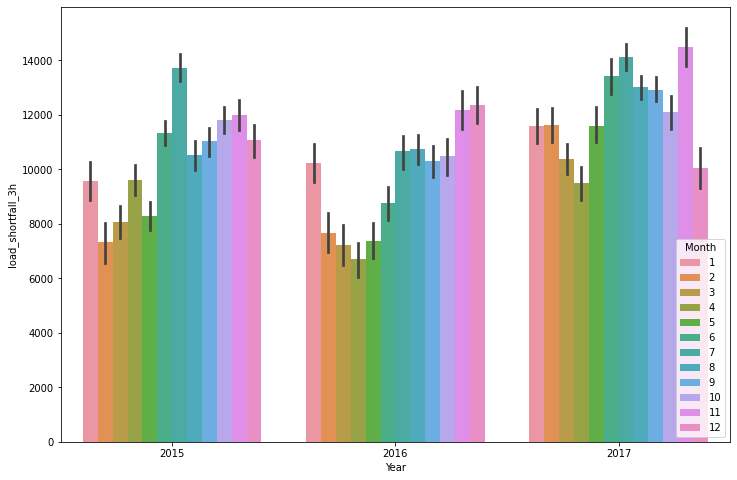

In [22]:
# multiple bar barchat showing the relationship of load shortfalls to months by yearly variation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Month', data=train_df_clean, ax=ax)
plt.show()

The barchart below is the 3 hour load shortfall aggregated by weekday and then by year. We are sort of drilling down into the weekdays. It shows that during the week there was comparable shortfalls, but shortfalls reduce during weekends. For the month data, 0 is Monday while 6 is Sunday. 

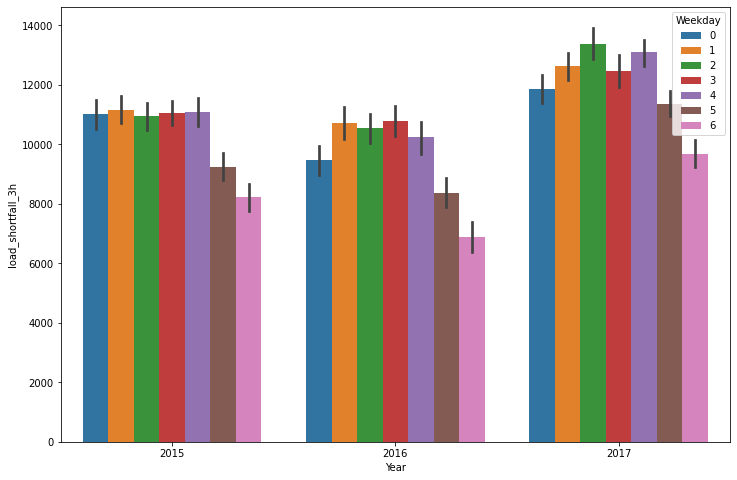

In [23]:
# multiple bar barchat showing the relationship of load shortfalls to months by yearly variation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Weekday', data=train_df_clean, ax=ax)
plt.show()

The bar chart below is the 3 hours shortfall aggregated by hour and then by the years. We can see a trend developing. The highest shortfalls occur during the night and evenings. The shortfalls were reduced during the morning time and noon but starts to increase after noon time. 

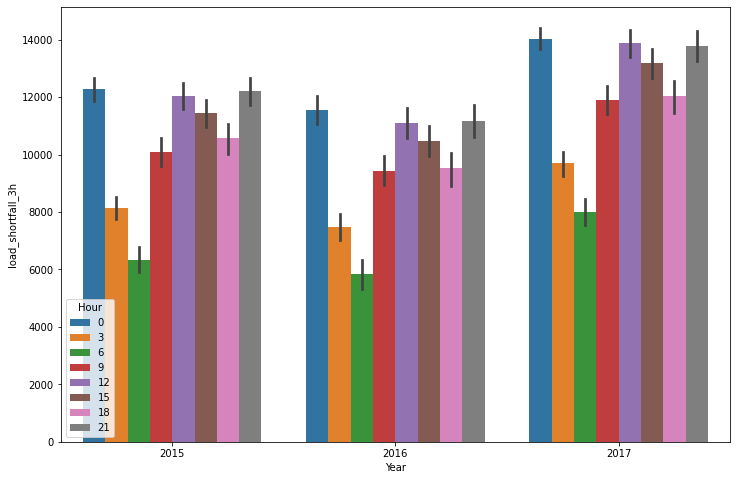

In [24]:
# multiple bar barchat showing the relationship of load shortfalls to months by yearly variation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Hour', data=train_df_clean, ax=ax)
plt.show()

# 4.3  Valencia Wind Degree
Valencia_wind_deg is another categorical feature in the dataset. We need to encode it to a numerical feature. Let's see what insight we can get from it

In [25]:
# get all the unique values in the feature
train_df_clean['Valencia_wind_deg'].unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

We can see that the feature is made of levels. That means it is an ordinal feature. So, we only need to extract the numerical values from the strings and encode it as the values. Then convert the datatype to int since it will still be an object. 

In [26]:
# encode the Valencia_wind_deg values as numbers
train_df_clean['Valencia_wind_deg'] = train_df_clean['Valencia_wind_deg'].str.extract(r'(\d+$)')


In [27]:
# convert to numeric type
train_df_clean["Valencia_wind_deg"] = train_df_clean["Valencia_wind_deg"].astype(str).astype(int)


In [28]:
train_df_clean["Valencia_wind_deg"].head()

Unnamed: 0
0     5
1    10
2     9
3     8
4     7
Name: Valencia_wind_deg, dtype: int32

Now we carry the same opertion on the test data set for consistency.

In [29]:
# encode the Valencia_wind_deg values as numbers
test_df_clean['Valencia_wind_deg'] = test_df_clean['Valencia_wind_deg'].str.extract(r'(\d+$)')
# convert to numeric type
test_df_clean["Valencia_wind_deg"] = test_df_clean["Valencia_wind_deg"].astype(str).astype(int)


# Exploratory Data Analysis On Valencia Wind 

# 

From the bar chart below, we see that the lower levels of wind speed in Valencia result in the highest short falls. So, this is a trend. 

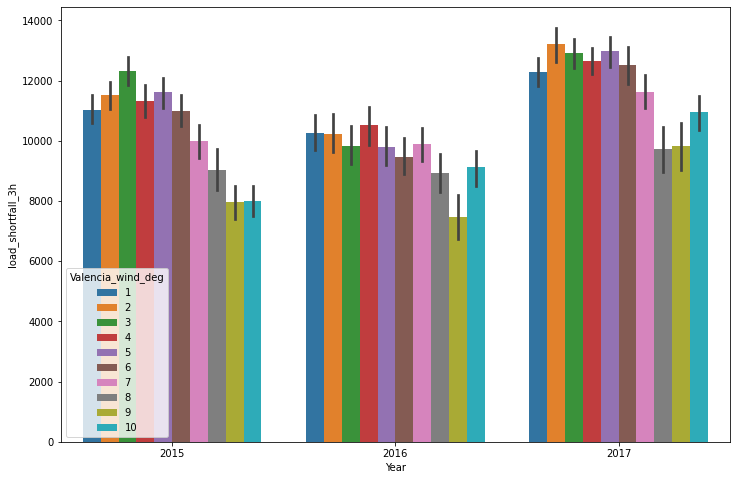

In [30]:
# multiple bar barchat showing the relationship of load shortfalls to months by yearly variation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Valencia_wind_deg', data=train_df_clean, ax=ax)
plt.show()

#  4.4 The Third Categorical feature, Seville Pressure

As we can see from the unique values in the feature, the feature is also ranked. So we need to extract just the numbers and convert it to a numeric datatype.

In [31]:
train_df_clean["Seville_pressure"].unique()

array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

In [32]:
# encode the Valencia_wind_deg values as numbers
train_df_clean['Seville_pressure'] = train_df_clean['Seville_pressure'].str.extract(r'(\d+$)')
# convert to numeric type
train_df_clean['Seville_pressure'] = train_df_clean['Seville_pressure'].astype(str).astype(int)



we do the same operation to the test data set

In [33]:
# encode the Valencia_wind_deg values as numbers
test_df_clean['Seville_pressure'] = test_df_clean['Seville_pressure'].str.extract(r'(\d+$)')
# convert to numeric type
test_df_clean['Seville_pressure'] = test_df_clean['Seville_pressure'].astype(str).astype(int)



# Exploratory Data Analysis For Seville Pressure

From the bar chart below, we see that the extremes of pressure in Seville result in higher energy shortfalls. 

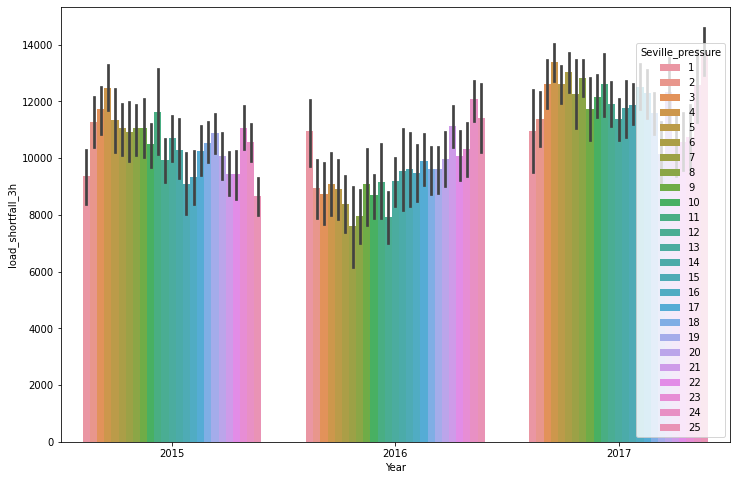

In [34]:
# multiple bar barchat showing the relationship of load shortfalls to months by yearly variation
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='load_shortfall_3h', hue='Seville_pressure', data=train_df_clean, ax=ax)
plt.show()

# 4.5 Search for Missing Values
Right now, there are no categorical variables. The data set is composed solely of numerical features which is needed for the regression model. So let's search for missing values in the data set. 

The code output above shows that only one feature, Valencia_pressure, contains missing value. So the question is whether we have to impute it with the mean, median, or mode. To do this, we have to find out if the feature has outliers. Outliers interfere with the mean. 

In [35]:
test_df_clean.isnull().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

We can see from the boxplot below that the feature, Valencia_pressure, has lots of outliers. So we wil have to impute the mode for the missing values. I chose the mode because pressure has a recurring pattern of lows and highs so the mode will accurately capture which pattern occurs more frequently to represent the missing values. 

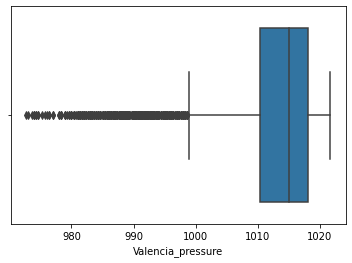

In [36]:
ax = sns.boxplot(x="Valencia_pressure", data=train_df_clean)

In [37]:
# imput missing values using mode
train_df_clean["Valencia_pressure"].fillna(train_df_clean["Valencia_pressure"].mode()[0], inplace=True)

We will have to carry out the same imputation on the test data set. A cursory examination shows that Valencia_pressure is the only feature with missing values in the test data set. 

In [38]:
test_df_clean.isnull().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

So we need to impute the mode into missing cells. 

In [39]:
# imput missing values using mode
test_df_clean["Valencia_pressure"].fillna(test_df_clean["Valencia_pressure"].mode()[0], inplace=True)

In [40]:
test_df_clean.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

So right now the data cleaning is complete. No feature has a missing value in the train and test data sets. WE go on to do an exhaustive exploratory data analysis of the data. 

# 4.6 Exploratory Data Analysis

## Basic Analysis
Let's do a basic analysis to see what our data set contains after cleaning

From the code below we see that we have 8763 observations and 51 features. None of the features contain any null values which we confirmed during the data cleaning phase. 

In [42]:
train_df_clean.shape

(8763, 51)

## Univariate Analysis - Non-graphical
We will be looking at the descriptive statistics of each feature like the mean, standard deviation and five number summary of each feature. The five number summary are the min, max, median, 1st and 3rd quartiles. 

In [43]:
train_df_clean.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,5.276389,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612,2016.000571,6.524820,3.005478,10.498459
std,1.850371,2.877642,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404,0.816054,3.447976,1.999193,6.874031
min,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000,2015.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333,2015.000000,4.000000,1.000000,4.500000
50%,2.000000,5.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667,2016.000000,7.000000,3.000000,9.000000
75%,3.333333,8.000000,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667,2017.000000,10.000000,5.000000,15.000000
max,13.000000,10.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000,2017.000000,12.000000,6.000000,21.000000


Let's take a measure of skew in the data. We want to see how symmetrical the data is to give us a sense of whether they would follow a normal distribution. 

In [ ]:
train_df_clean.skew()

We notice that most of the features are fairly symmetrical. But there are extremes of positive skew like the snow features for Bilbao and Valencia, and the rain features for Seville, Barcelona and Madrid and pressure features for Barcelona. It must be due to extreme weather at these places which could be due to climate change. We expect that there would be high energy shortfalls due to this conditions. 

Kurtosis

Now let's look for the presence of outliers in the features. Outlier detection is very important because we need to have standardized ranges for all the features. 

In [ ]:
train_df_clean.kurtosis()

From the output above, it is noticed that less than 20 percent of the features have significant outliers. That is a good start. But that means the data set would have to be standardized to accomodate for these outliers so they do not influence the modeling process. 

## Univariate Analysis: Graphical

it would be insightful to take a subset of the weather conditions in each of the cities. There are five cities and sometimes three for each weather condition. Let's do the plotting for them. 

#### Wind speed

Spain uses a lot of wind energy so it would be insightful to get a look at the data for wind speed because wind speed determines whether the energy infrastructure can work at full capacity or not. 

Histogram of wind speed for the five cities: Madrid, Valencia, Bilbao, Barcelona and Seville.

array([[<AxesSubplot:title={'center':'Madrid_wind_speed'}>,
        <AxesSubplot:title={'center':'Valencia_wind_speed'}>],
       [<AxesSubplot:title={'center':'Bilbao_wind_speed'}>,
        <AxesSubplot:title={'center':'Barcelona_wind_speed'}>],
       [<AxesSubplot:title={'center':'Seville_wind_speed'}>,
        <AxesSubplot:>]], dtype=object)

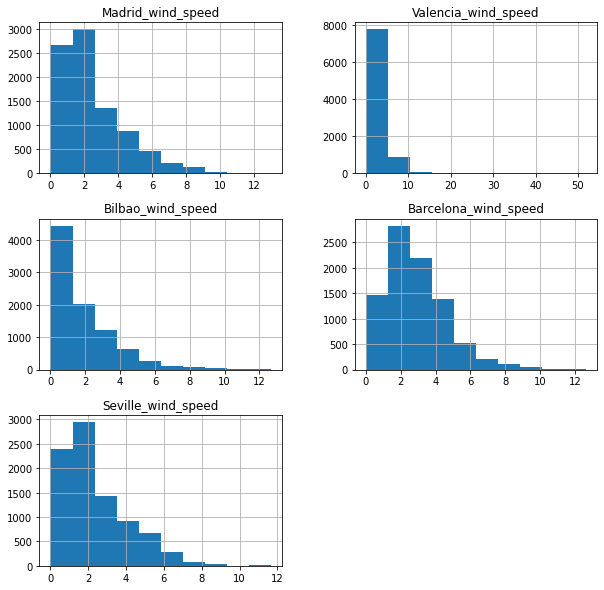

In [48]:
features = ["Madrid_wind_speed", "Valencia_wind_speed", "Bilbao_wind_speed", "Barcelona_wind_speed", "Seville_wind_speed"]
train_df_clean[features].hist(figsize=(10,10))

From the histogram, we see that the means are higher than the modes. Valencia_wind_speed is an encoded feature so ignore it. Also, wind speed is a positively skewed feature. That means, most of the values are concentrated to the right of the mode and tends to be high. 

### Rain 

Since Spain also uses solar energy for energy generation, let's take a look at the histogram for rainfall. Rainfall significantly affects the generation of both wind and solar energy. We could derive some insights from it. 

array([[<AxesSubplot:title={'center':'Barcelona_rain_1h'}>,
        <AxesSubplot:title={'center':'Barcelona_rain_3h'}>],
       [<AxesSubplot:title={'center':'Seville_rain_1h'}>,
        <AxesSubplot:title={'center':'Seville_rain_3h'}>],
       [<AxesSubplot:title={'center':'Bilbao_rain_1h'}>,
        <AxesSubplot:title={'center':'Madrid_rain_1h'}>]], dtype=object)

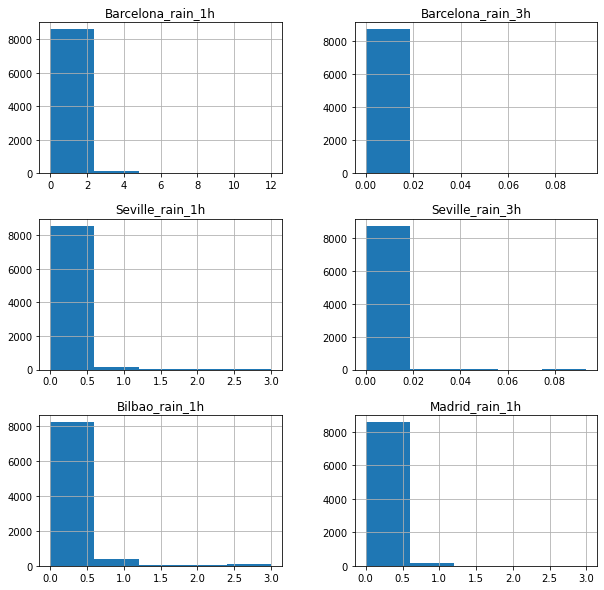

In [51]:
features = ["Barcelona_rain_1h", "Barcelona_rain_3h", "Seville_rain_1h", "Seville_rain_3h", "Bilbao_rain_1h", "Madrid_rain_1h"]
train_df_clean[features].hist(figsize=(10,10), bins=5)

From the histogram, we see that rainfall is constant in all four regions, except for some occasions when there are extremes of rainfall. 

## Multivariate Analysis - Non-Graphical

We will conduct a non-graphical multivariate analysis because the features are many (51)

In [55]:
train_df_clean.corr()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Weekday,Hour
Madrid_wind_speed,1.000000,0.121835,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981,-0.031553,-0.237445,-4.042128e-04,1.862275e-01
Valencia_wind_deg,0.121835,1.000000,0.199288,0.292731,0.240007,0.253549,0.158266,0.075864,0.085519,0.157252,...,-0.240981,-0.292904,-0.311775,-0.337965,-0.316603,-0.188674,-0.057513,-0.140195,1.306817e-02,-1.384151e-01
Bilbao_rain_1h,0.259719,0.199288,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510,-0.200747,-0.188274,3.232531e-02,5.452669e-02
Valencia_wind_speed,0.513092,0.292731,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791,-0.012650,-0.237156,1.896518e-02,2.041029e-01
Seville_humidity,-0.117892,0.240007,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290,-0.045730,-0.111622,8.265003e-03,-4.249821e-01
Madrid_humidity,-0.137092,0.253549,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536,-0.084456,-0.076567,4.108225e-03,-3.078718e-01
Bilbao_clouds_all,0.244001,0.158266,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293,-0.031658,-0.117452,3.834215e-02,-2.371425e-02
Bilbao_wind_speed,0.377854,0.075864,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602,0.082611,-0.086698,-9.542737e-03,1.978484e-01
Seville_clouds_all,0.191251,0.085519,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804,-0.089657,-0.170345,1.771258e-02,-1.740111e-02
Bilbao_wind_deg,0.270950,0.157252,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800,-0.104647,-0.174941,7.095492e-03,1.104574e-01


On a general basis, we find a weak correlation among the features and even with the target variable. One significant correlation was that between Madrid_humidity and Seville_humidity. 

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic